In [2]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('Reviews.csv')

Text(0.5, 1.0, 'Histogram of Scores')

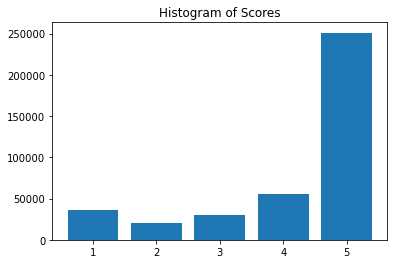

In [82]:
import matplotlib.pyplot as plt
plt.hist(data['Score'], bins=[0.5,1.5,2.5,3.5,4.5,5.5], rwidth=0.8)
plt.title('Histogram of Scores')

In [88]:
data['Score'].value_counts()[5]/data['Score'].value_counts().sum()

0.6370684206117315

In [6]:
import warnings
warnings.filterwarnings("ignore")                     #Ignoring unnecessory warnings

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd

import nltk                                         #Natural language processing tool-kit

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
from gensim.models import Word2Vec 

In [9]:
#basic cleaning
import time

data = data.drop_duplicates(subset = {"UserId","ProfileName","Time","Text"})
data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]

nltk.download('stopwords')

stop = set(stopwords.words('english'))

#removing spaces and stopwords
import re
# function to clean data
def clean_data(X):
    temp =[]
    snow = nltk.stem.SnowballStemmer('english')
    start = time.time()
    for i, sentence in enumerate(X):
        if i%10000 == 0:
            print(i, 'Time taken:', time.time()-start)
            start = time.time()
        sentence = sentence.lower()                 # Converting to lowercase
        cleanr = re.compile('<.*?>')
        sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
        sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
        sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations

        words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')]   # Stemming and removing stopwords
        temp.append(words)

    X = temp    

    sent = []
    for row in X:
        sequ = ''
        for word in row:
            sequ = sequ + ' ' + word
        sent.append(sequ)

    return sent

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/klejdisevdari/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# full data Logistic Regression
X, y = data['Text'], data['Score']
X.shape, y.shape

((393931,), (393931,))

In [11]:
X = clean_data(X)

0 Time taken: 2.09808349609375e-05
10000 Time taken: 37.41135382652283
20000 Time taken: 40.35683012008667
30000 Time taken: 37.84476685523987
40000 Time taken: 38.13825702667236
50000 Time taken: 38.33553409576416
60000 Time taken: 40.286473989486694
70000 Time taken: 42.700039863586426
80000 Time taken: 38.96642184257507
90000 Time taken: 39.81103801727295
100000 Time taken: 36.96405291557312
110000 Time taken: 38.304811000823975
120000 Time taken: 42.17007303237915
130000 Time taken: 37.927468061447144
140000 Time taken: 36.52198123931885
150000 Time taken: 39.42454195022583
160000 Time taken: 39.994914054870605
170000 Time taken: 39.07661581039429
180000 Time taken: 37.804816007614136
190000 Time taken: 38.174763202667236
200000 Time taken: 42.023658990859985
210000 Time taken: 38.21541881561279
220000 Time taken: 37.75209593772888
230000 Time taken: 39.77808380126953
240000 Time taken: 36.17575478553772
250000 Time taken: 37.346688985824585
260000 Time taken: 38.087172985076904
27

In [19]:
X

393931

In [22]:
# write to a new file the entries of X
with open('cleaned_data.txt', 'w') as f:
    for item in X:
        f.write(item + '\n')

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# Create a CountVectorizer object to convert our bags of words into a matrix of word counts
vectorizer = CountVectorizer()

# Use the vectorizer to transform our training data into a matrix of word counts
X_train = vectorizer.fit_transform(X_train)

In [20]:
X_train.shape

(315144, 79759)

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Use the vectorizer to transform our test data into a matrix of n-grams
X_test = vectorizer.transform(X_test)

# Use the classifier to predict the labels for our test data
y_pred = clf.predict(X_test)

# Evaluate the performance of our classifier using accuracy as the metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7118814017540965


In [23]:
#For TF-IDF 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Create a TfidfVectorizer object to convert our text into a matrix of TF-IDF features
vectorizer = TfidfVectorizer()

# Use the vectorizer to transform our training data into a matrix of TF-IDF features
X_train = vectorizer.fit_transform(X_train)

# Create a decision tree classifier and fit it to our training data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Use the vectorizer to transform our test data into a matrix of TF-IDF features
X_test = vectorizer.transform(X_test)

# Extract the labels from our test data
y_test = y_test

# Use the classifier to predict the labels for our test data
y_pred = clf.predict(X_test)

# Evaluate the performance of our classifier using accuracy as the metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.719877644789115


In [25]:
movie_reviews = pd.read_csv('movie_train.tsv', sep='\t');
movie_reviews = movie_reviews.drop_duplicates(subset=['SentenceId'], keep='first')


(8529, 4)

In [26]:
X_movie = movie_reviews['Phrase']
y_movie = movie_reviews['Sentiment'] + 1
X_movie.shape, y_movie.shape

((8529,), (8529,))

In [27]:
X_movie = clean_data(X_movie)

0 Time taken: 2.8848648071289062e-05


In [28]:
X_movie = vectorizer.transform(X_movie)

In [29]:
y_pred = clf.predict(X_movie)
accuracy = accuracy_score(y_movie, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.19896822605229217


In [92]:
for ind in range(320, 340):
  print(data['Text'][ind])
  y = clf.predict(vectorizer.transform([data['Text'][ind]]))
  print(y)

These individually wrapped pieces are delicious (although I wish there were a few more). Mildly sweet with no sugar-free aftertaste, even a traditional "marzipan-aholic" should enjoy these.
[5]
Put this in my husbands stocking for Christmas and it was a hit.
[5]
I was amazed at how quickly it arrived!  It is a cute stocking stuffer, but only OK as far as user appeal.  You get what you pay for.
[3]
Toy was typical quality I expected.  I got taken for a major ride on the shipping!
[5]
So we cancelled the order.  It was cancelled without any problem.  That is a positive note...
[5]
i love the convenience of the singles. The best creamer around.Taste is just like the big bottle. I can stick them in my purse and take them to work.
[5]
These creamers come in 4 packs of 25. I have taken one to work and opened one for home so far, and haven't found a single broken or leaking creamer yet. I usually have way too much cream and sugar in my coffee, but with these it is easy for me to cut down on t

In [106]:
sentence = "I love this product."
vectorized = vectorizer.transform([sentence])
y = clf.predict(vectorized)
print(y)

[5]


(array([ 30450.,      0.,   5856.,      0.,      0.,  15927.,      0.,
         19391.,      0., 243520.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

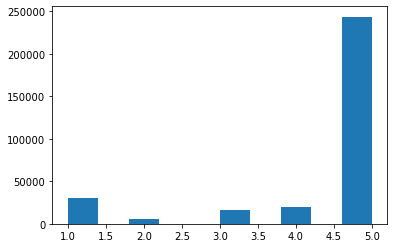

In [90]:
plt.hist(clf.predict(X_train))